Nama : HASNA ALMAAS TRISTO

NIM : 22.11.5187

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!pip install pandas numpy scikit-learn nltk

In [9]:
import pandas as pd
import numpy as np
from google.colab import files
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [19]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


dataset = pd.read_csv("/content/drive/MyDrive/BDDM/UAS/Dataset-SA.csv")
print("\nJumlah data awal:", len(dataset))

# Memotong Dataset Secara Berurutan
# Ambil 8000 baris pertama
sampled_dataset = dataset[:10000]
print("\nJumlah data setelah dipotong:", len(sampled_dataset))

# Menyimpan Dataset yang Sudah Dipotong
output_file = "Prep_Dataset-SA.csv"
sampled_dataset.to_csv(output_file, index=False)
print(f"Dataset disimpan sebagai {output_file}")

# karena jumlah data ada 205052 jadi dilakukan pemotongan agar lebih meningkatkan efisiensi komputasi pada proses selanjutnya

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Jumlah data awal: 205052

Jumlah data setelah dipotong: 10000
Dataset disimpan sebagai Prep_Dataset-SA.csv


In [36]:
# Load dataset
file_path = '/content/Prep_Dataset-SA.csv'
dataset = pd.read_csv(file_path)

dataset.head()

# Drop duplicates
dataset_cleaned = dataset.drop_duplicates()

# Handle missing values
dataset_cleaned['Review'] = dataset_cleaned['Review'].fillna('')  # Replace NaN in 'Review' with empty string
dataset_cleaned['Summary'] = dataset_cleaned['Summary'].fillna(dataset_cleaned['Review'])  # Replace NaN in 'Summary' with 'Review'

# Bersihkan dan ubah kolom 'Rate'
def clean_rate(value):
    try:
        return int(value)  
    except ValueError:
        return np.nan  

dataset_cleaned['Rate'] = dataset_cleaned['Rate'].apply(clean_rate)

# Hapus baris dengan NaN di kolom 'Rate' 
dataset_cleaned = dataset_cleaned.dropna(subset=['Rate'])

# Mengonversi 'product_price' menjadi angka
dataset_cleaned['product_price'] = pd.to_numeric(dataset_cleaned['product_price'], errors='coerce')

# Encode Sentiment
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
dataset_cleaned['Sentiment'] = dataset_cleaned['Sentiment'].map(sentiment_mapping)

# Memproses teks (lowercasing, removing special characters, stopwords, dll)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # menghapus  non-alphabetic characters
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Remove stopwords and lemmatize
    return text

dataset_cleaned['Cleaned_Review'] = dataset_cleaned['Review'].apply(preprocess_text)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X = tfidf.fit_transform(dataset_cleaned['Cleaned_Review']).toarray()
y = dataset_cleaned['Sentiment'].values

# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the processed datasets
print(f"\nTraining set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}\n")



Training set shape: (7571, 173), (7571,)
Test set shape: (1893, 173), (1893,)



<ipython-input-36-897142985368>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cleaned['Review'] = dataset_cleaned['Review'].fillna('')  # Replace NaN in 'Review' with empty string
<ipython-input-36-897142985368>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cleaned['Summary'] = dataset_cleaned['Summary'].fillna(dataset_cleaned['Review'])  # Replace NaN in 'Summary' with 'Review'
<ipython-input-36-897142985368>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

<ipython-input-37-15110d3df9fc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


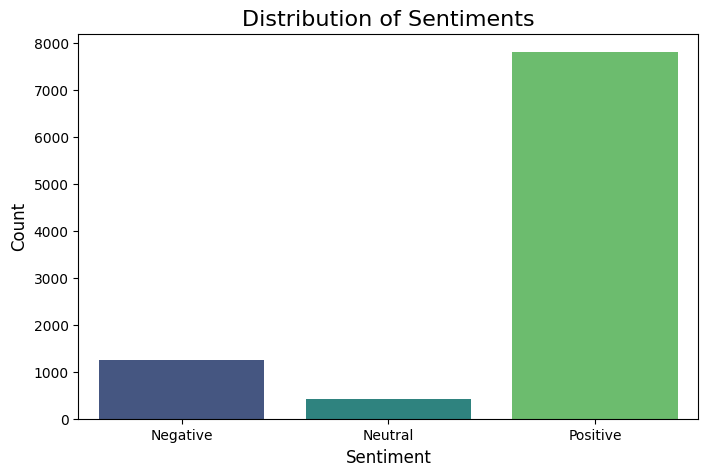

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi label sentimen
sentiment_counts = dataset_cleaned['Sentiment'].value_counts()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'], fontsize=10)
plt.show()


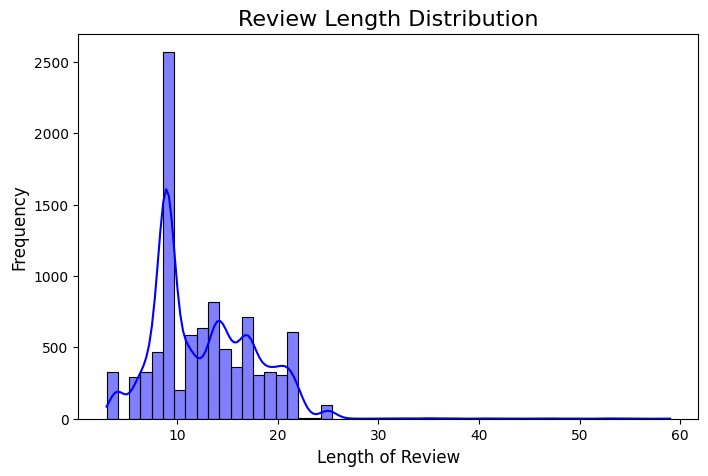

In [38]:
# Hitung panjang ulasan
dataset_cleaned['review_length'] = dataset_cleaned['Review'].apply(len)

# Visualisasi panjang ulasan
plt.figure(figsize=(8, 5))
sns.histplot(dataset_cleaned['review_length'], bins=50, kde=True, color='blue')
plt.title('Review Length Distribution', fontsize=16)
plt.xlabel('Length of Review', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


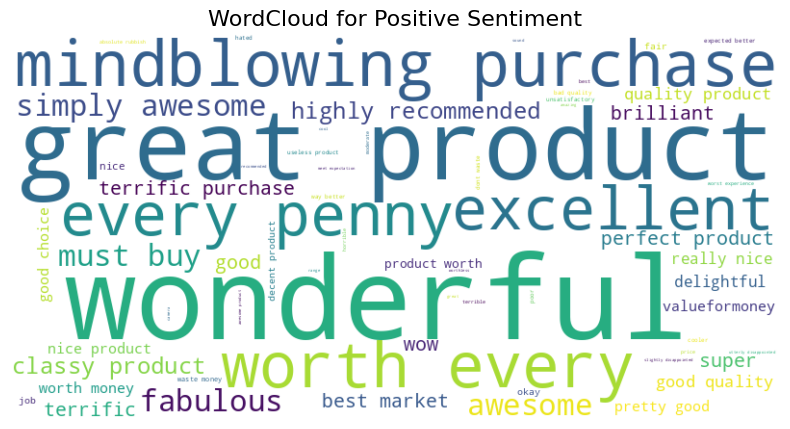

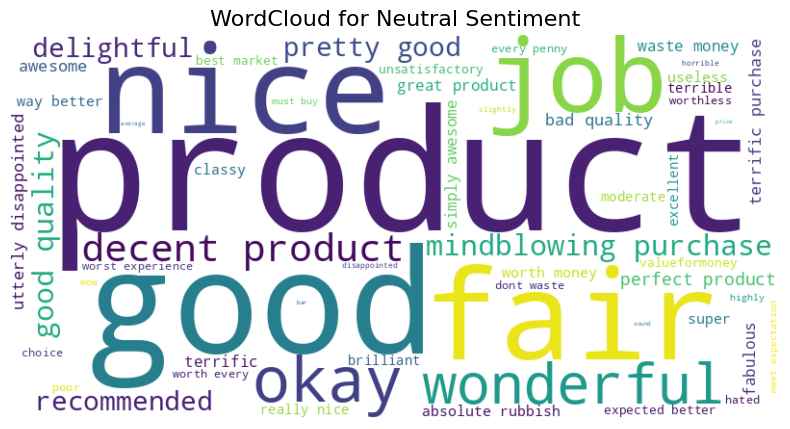

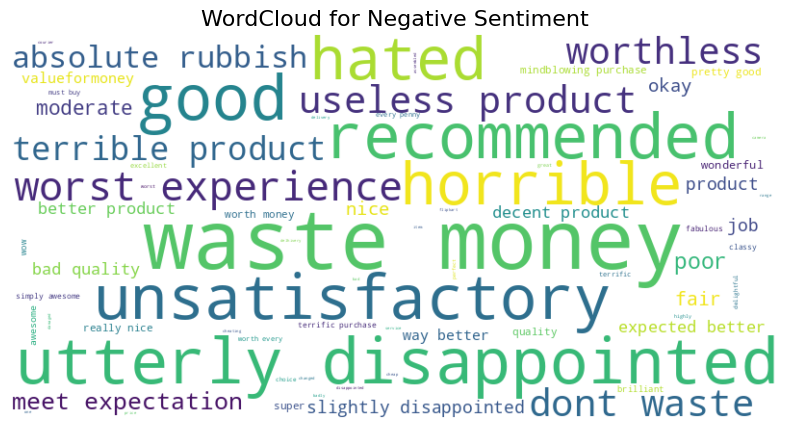

In [39]:
from wordcloud import WordCloud

# WordCloud untuk setiap sentimen
sentiments = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
for sentiment, label in sentiments.items():
    text = ' '.join(dataset_cleaned[dataset_cleaned['Sentiment'] == sentiment]['Cleaned_Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {label} Sentiment', fontsize=16)
    plt.show()

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# Load dataset
file_path = '/content/Prep_Dataset-SA.csv'
dataset = pd.read_csv(file_path)

# Preprocessing dasar
dataset = dataset.drop_duplicates()
dataset['Review'] = dataset['Review'].fillna('')
dataset['Sentiment'] = dataset['Sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Transformasi TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(dataset['Review'])  # Tetap dalam format sparse
y = dataset['Sentiment'].values

# Seleksi Fitur dengan Chi-Square
k = 20  # Jumlah fitur terbaik
chi2_selector = SelectKBest(chi2, k=k)
X_kbest = chi2_selector.fit_transform(X, y)

# Ambil nama fitur dan skor
selected_features_indices = chi2_selector.get_support(indices=True)
selected_features = np.array(tfidf.get_feature_names_out())[selected_features_indices]
feature_scores = chi2_selector.scores_[selected_features_indices]

# Tampilkan hasil
for feature, score in zip(selected_features, feature_scores):
    print(f"Feature: {feature}, Score: {score}")

Feature: absolute, Score: 181.054289332754
Feature: did, Score: 162.31714497617034
Feature: disappointed, Score: 357.74318891705883
Feature: don, Score: 177.18714401229602
Feature: expectations, Score: 162.31714497617034
Feature: experience, Score: 228.71501923215482
Feature: fair, Score: 106.03690603862553
Feature: hated, Score: 315.4068191775597
Feature: horrible, Score: 337.20439708832527
Feature: meet, Score: 162.31714497617034
Feature: moderate, Score: 164.76808713867354
Feature: poor, Score: 186.71647151369433
Feature: rubbish, Score: 181.054289332754
Feature: terrible, Score: 252.2543413203883
Feature: unsatisfactory, Score: 349.53073931901025
Feature: useless, Score: 240.19820579085786
Feature: utterly, Score: 296.69317709312634
Feature: waste, Score: 343.73950338181095
Feature: worst, Score: 235.96117642772882
Feature: worthless, Score: 302.9900189911274


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Split data into training and testing sets (gunakan data hasil seleksi fitur)
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the model
model_path = "svm_sentiment_model_5187.pkl"
joblib.dump(svm_model, model_path)
print(f"Model saved to {model_path}")


Accuracy: 0.895932382461701

Classification Report:
               precision    recall  f1-score   support

          -1       0.86      0.61      0.71       246
           0       0.00      0.00      0.00        87
           1       0.90      0.99      0.94      1560

    accuracy                           0.90      1893
   macro avg       0.59      0.53      0.55      1893
weighted avg       0.85      0.90      0.87      1893

Model saved to svm_sentiment_model_5187.pkl


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.61      0.71       246
     Neutral       0.00      0.00      0.00        87
    Positive       0.90      0.99      0.94      1560

    accuracy                           0.90      1893
   macro avg       0.59      0.53      0.55      1893
weighted avg       0.85      0.90      0.87      1893



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


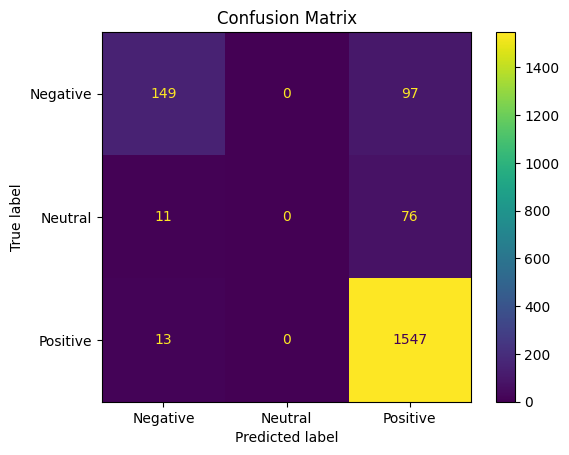


Cross-Validation Accuracy: 0.90 (+/- 0.00)


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

# Cross-validation score (optional)
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores):.2f})")
